In [2]:
import pandas as pd
import imageio
import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = preprocessing.load_data()
data.shape

(916, 20)

In [4]:
data['На срезе визуализируются межпозвоночные диски'].value_counts()

Не визуализируются (срез не пригоден для разметки)    531
Визуализируются (можно размечать)                     365
Name: На срезе визуализируются межпозвоночные диски, dtype: int64

In [5]:
data = preprocessing.select_using_data(data)
data.shape

(356, 20)

In [6]:
using_labels, indx2labels, labels2indx, indx2color =\
    preprocessing.create_label_indx_mappings(data)

shejnyj-mezhpozvonochnyj-disk-zdorovyj                       961
grudnoj-mezhpozvonochnyj-disk-zdorovyj                       912
shejnyj-mezhpozvonochnyj-disk-patologicheskij                403
shejnyj-mezhpozvonochnyj-disk-s-podozreniem-na-patologiyu    338
grudnoj-mezhpozvonochnyj-disk-s-podozreniem-na-patalogiyu     52
grudnoj-mezhpozvonochnyj-disk-patologicheskij                 26
hernia                                                         1
protrusion                                                     1
dtype: int64

Using labels: ['shejnyj-mezhpozvonochnyj-disk-zdorovyj', 'grudnoj-mezhpozvonochnyj-disk-zdorovyj', 'shejnyj-mezhpozvonochnyj-disk-patologicheskij', 'shejnyj-mezhpozvonochnyj-disk-s-podozreniem-na-patologiyu', 'grudnoj-mezhpozvonochnyj-disk-s-podozreniem-na-patalogiyu', 'grudnoj-mezhpozvonochnyj-disk-patologicheskij']


### Random mri each call

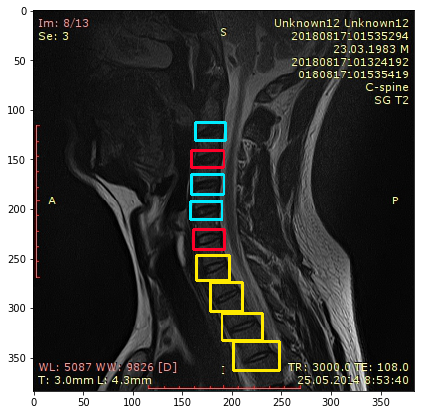

In [29]:
for row in data.sample(1).iterrows():
    row = row[1]
    path, objects = preprocessing.parse_row(row)
    img = imageio.imread(path)
    
    plt.figure(figsize=(7, 7))
    img = preprocessing.draw_objects(img, objects, labels2indx, indx2color)
    plt.imshow(img)

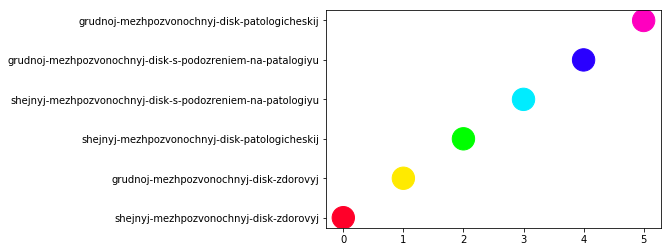

In [16]:
plt.scatter(indx2labels.keys(), indx2labels.values(),
            c=[indx2color(i) for i in range(len(indx2labels))], s=500)

### TODO: hide all area with text

## Split

In [20]:
data.shape[0] // 7 * 5

250

In [19]:
train_paths, val_paths, test_paths, train_objs, val_objs, test_objs = preprocessing.split_data(
    data, labels2indx, folds=7)

In [22]:
shapes = [str(imageio.imread(p).shape) for p in train_paths]
pd.Series.value_counts(shapes)

(384, 384, 3)    246
(512, 512, 3)      4
dtype: int64

In [24]:
512 % 64, 384 % 64

(0, 0)

---

pip install https://github.com/Simon-Campbell/dicttoxml/archive/b0777caf0ccf64c97a9c47a70b9ced6e0c51ddf7.zip

Add fold_list parameter